<br>

First, we will import several necessary Python packages. We will be using the <a href="http://pandas.pydata.org/">Python Data Analysis Library,</a> or <i>PANDAS</i>, extensively for our data manipulations. It is invaluable for analyzing datasets. 

### Import Packages

In [1]:
import numpy as np
import pandas as pd

from pandas import DataFrame
from pandas import Series

<br>

We can check which version of various packages we're using. You can see I'm running PANDAS 0.17 here.

In [2]:
print pd.__version__

0.24.2


<br>

PANDAS allows you to set various options for, among other things, inspecting the data. I like to be able to see all of the columns. Therefore, I typically include this line at the top of all my notebooks.

In [3]:
#http://pandas.pydata.org/pandas-docs/stable/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 200)

<br>The next four lines are for various graphing options

In [4]:
import matplotlib.pyplot as plt

In [5]:
#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*

In [6]:
%matplotlib inline  

In [7]:
import seaborn as sns
print sns.__version__

0.9.0


In [8]:
plt.rcParams['figure.figsize'] = (10, 7.5)

<br>To make sure PANDAS always returns a float

In [9]:
from __future__ import division

<br>I like suppressing scientific notation in my numbers. So, if you'd rather see "0.48" than "4.800000e-01", then run the following line. Note that this does not change the actual values. For outputting to CSV we'll have to run some additional code later on.

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Read in Data

PANDAS can read in data from a variety of different data types. You will read in a CSV file containing data from the Qualtrics survey you took last class.

In the following four lines we'll first import the CSV file and assign it to the name 'df' -- short for 'dataframe', the PANDAS name for a dataset. Second, we'll use the <i>len</i> function to see how many columns (variables) there are in the dataset, then we'll use the <i>len</i> function again to see how many rows (students) there are in the dataset; there are 43 observations in total. Finally, we will show the 'head' of the dataset -- the first 5 rows.

In [11]:
df = pd.read_csv('http://social-metrics.org/wp-content/uploads/2016/06/COM205_June-27-2016_01.18.csv')
print '# of columns:', len(df.columns)
print '# of observations:', len(df)
df.head()

# of columns: 4
# of observations: 43


,Recorded Date,Sleep,Happiness,Gender
0,2016-06-27T05:15:03Z,5.00,5,Female
1,2016-06-27T05:13:18Z,7.50,4,Female
2,2016-06-27T05:12:54Z,4.75,3,Male
3,2016-06-27T05:12:52Z,4.00,2,Male
4,2016-06-27T05:12:31Z,6.00,5,Female


<br>The opposite of 'head' is 'tail' -- we can use it to inspect the last few observations in the dataframe. As a default 5 rows are chosen; here let's specify 2 rows. 

In [12]:
df.tail(2)

,Recorded Date,Sleep,Happiness,Gender
41,2016-06-26T14:54:50Z,8.50,5,Female
42,2016-06-26T10:10:44Z,8.20,4,Male


#### Inspect Data Types for Columns
In PANDAS *object* indicates text columns and *int64* and *float64* indicate numerical data.

In [15]:
df.dtypes

Recorded Date     object
Sleep            float64
Happiness          int64
Gender            object
dtype: object

#### Describe the Data
We can use the *describe* command to show the descriptive statistics (also known as *summary statistics*) for the numerical variables in the dataset.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sleep,43.00,5.48,1.76,1.25,4.50,5.25,6.75,9.00
Happiness,43.00,3.67,1.06,1.00,3.00,4.00,4.50,5.00


### Plot Data - Boxplots

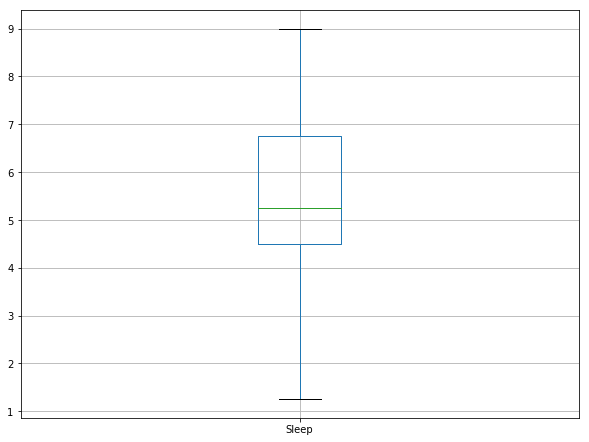

In [17]:
df.boxplot('Sleep', return_type='axes')

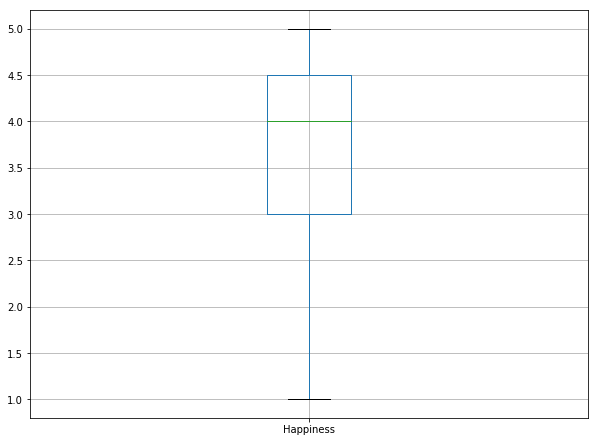

In [18]:
df.boxplot('Happiness', return_type='axes')

### Plot Hours of Sleep by Gender

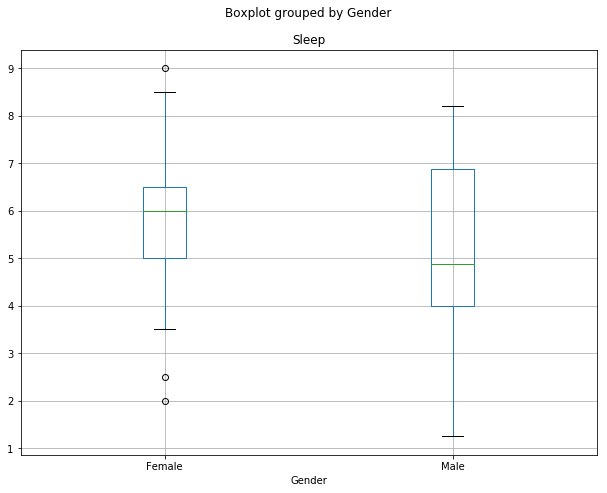

In [32]:
df.boxplot(column='Sleep', by='Gender')

### Recode Sleep

#### Variable Frequencies

Before recoding the variable, let's first take a look at the frequencies for the different values of the variable. To see the frequencies for the different values of a variable, use the *value_counts()* command.

In [33]:
df['Sleep'].value_counts()

5.00    6
7.50    4
6.00    4
6.50    3
4.00    3
4.50    3
5.25    3
7.00    3
3.50    1
9.00    1
2.00    1
8.00    1
8.20    1
1.25    1
3.00    1
5.50    1
2.50    1
4.25    1
6.25    1
4.75    1
8.50    1
3.35    1
Name: Sleep, dtype: int64

<br>Let's also take a look at a bar graph of the amount of sleep each student got. To get a more informative plot, we'll first *sort* the dataset and then plot it. We indicate a *bar* graph in the code. 

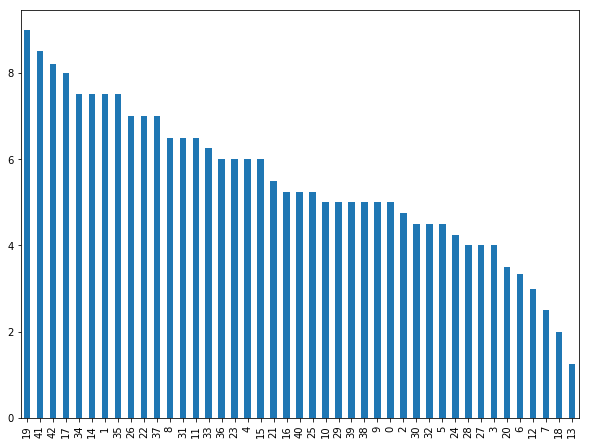

In [34]:
df.sort_values(by=['Sleep'], ascending=False)['Sleep'].plot(kind='bar')

<br>Based on the above plot, let's set the threshold at 6 hours of sleep per night. Those who got six or fewer hours of sleep per night will be considered 'low sleep', while everyone else will be considered 'normal' (or 'not low sleep').

What we will do in the following line of code is create a new dichotomous variable (also known as a *binary variable* or a *dummy variable*) called *Low_Sleep*. Numpy's *where* function is used to assign a value of *1* to all observations where the student got 6 or fewer hours of sleep, otherwise the student is coded as *0* on the variable *Low_Sleep*.

In [35]:
df['Low_Sleep'] = np.where(df['Sleep']<=6, 1, 0)

<br>It's always a good idea to confirm that you're recoding worked as expected. Let's do a *cross-tabulation* between the original and the newly recoded variables. 

In [36]:
pd.crosstab(df['Low_Sleep'], df['Sleep'])

Sleep,1.25,2.0,2.5,3.0,3.35,3.5,4.0,4.25,4.5,4.75,5.0,5.25,5.5,6.0,6.25,6.5,7.0,7.5,8.0,8.2,8.5,9.0
Low_Sleep,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,4,1,1,1,1
1,1,1,1,1,1,1,3,1,3,1,6,3,1,4,0,0,0,0,0,0,0,0


<br>We can also do a *conditional* cross-tab to see the same result in a compressed format.

In [37]:
pd.crosstab(df['Low_Sleep'], df['Sleep']<=6)

Sleep,False,True
Low_Sleep,,
0,15,0
1,0,28


<br>Let's plot *Happiness* level by the new variable *Low_Sleep*

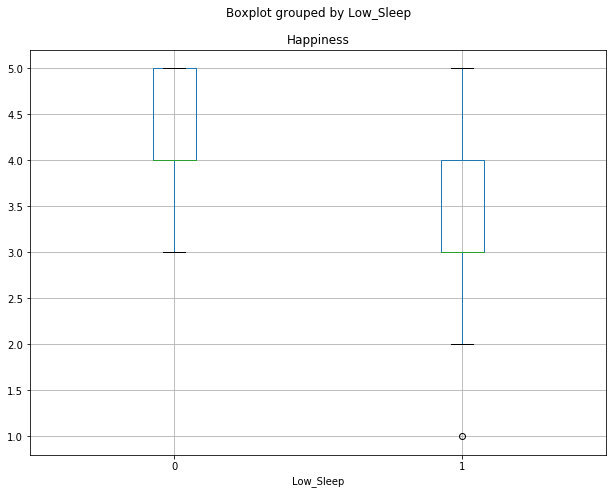

In [38]:
df.boxplot(column='Happiness', by='Low_Sleep')

### Recode Happiness

In [39]:
df.head(2)

,Recorded Date,Sleep,Happiness,Gender,Low_Sleep
0,2016-06-27T05:15:03Z,5.00,5,Female,1
1,2016-06-27T05:13:18Z,7.50,4,Female,0


In [40]:
df['Happiness'].value_counts()

4    14
3    12
5    11
2     5
1     1
Name: Happiness, dtype: int64

<br>Recall that the *Happiness* variable had 5 values. 1-2 were 'sad faces', 3 was 'neutral', and 4-5 were 'smiley faces.' Accordingly, let's create a new variable, *Happy*, where values of greater than 3 (i.e., scores of 4 or 5) are given a score of *1* on the variable, while values of 1, 2, or 3 are assigned scores of *0* on the new variable *Happy*.

In [41]:
df['Happy'] = np.where(df['Happiness']>3, 1, 0)
df.head()

,Recorded Date,Sleep,Happiness,Gender,Low_Sleep,Happy
0,2016-06-27T05:15:03Z,5.00,5,Female,1,1
1,2016-06-27T05:13:18Z,7.50,4,Female,0,1
2,2016-06-27T05:12:54Z,4.75,3,Male,1,0
3,2016-06-27T05:12:52Z,4.00,2,Male,1,0
4,2016-06-27T05:12:31Z,6.00,5,Female,1,1


<br>Once again, let's run some cross-tabulations to verify.

In [42]:
pd.crosstab(df['Happiness'], df['Happy'])

Happy,0,1
Happiness,,
1,1,0
2,5,0
3,12,0
4,0,14
5,0,11


In [43]:
pd.crosstab(df['Happiness']>3, df['Happy'])

Happy,0,1
Happiness,,
False,18,0
True,0,25


### Recode Gender

<br>Let's say you wanted to create a new variable called *Male*. You could use the same *np.where* command as above in order to help you do this. 

In [44]:
df['Male'] = np.where(df['Gender']=='Male', 1, 0)
df.head()

,Recorded Date,Sleep,Happiness,Gender,Low_Sleep,Happy,Male
0,2016-06-27T05:15:03Z,5.00,5,Female,1,1,0
1,2016-06-27T05:13:18Z,7.50,4,Female,0,1,0
2,2016-06-27T05:12:54Z,4.75,3,Male,1,0,1
3,2016-06-27T05:12:52Z,4.00,2,Male,1,0,1
4,2016-06-27T05:12:31Z,6.00,5,Female,1,1,0


<br>To verify, let's run a cross-tab of *Male* with *Gender*

In [45]:
pd.crosstab(df['Male'], df['Gender'])

Gender,Female,Male
Male,,
0,25,0
1,0,18


### Save New DataFrame

If you'd like, you could save the dataframe in PANDAS' native format. It's called 'pickling' a file, so we'll give it the typical 'pkl' extension.

In [46]:
df.to_pickle('Qualtrics Survey - COM205.pkl')

### T-Test

<br>Let's now run some statistics. First, let's try a t-test on *Gender* and *Happiness*. Recall that a t-test is a test of the difference in *means* between two groups -- in this case, between men and women. 

Let's start by computing the means for men and for women, then print the result.

In [47]:
print "Mean Happiness Level for Men:  ", df[df['Gender']=='Male']['Happiness'].mean()
print "Mean Happiness Level for Women:", df[df['Gender']=='Female']['Happiness'].mean()

Mean Happiness Level for Men:   3.4444444444444446
Mean Happiness Level for Women: 3.84


<br>We can use a similar command, using *std( )* instead of *mean( )*, to get the standard deviations.

In [48]:
print "Standard Deviation of Happiness Level for Men:  ", df[df['Gender']=='Male']['Happiness'].std()
print "Standard Deviation of Happiness Level for Women:", df[df['Gender']=='Female']['Happiness'].std()

Standard Deviation of Happiness Level for Men:   0.9217771979249535
Standard Deviation of Happiness Level for Women: 1.1430952132988166


<br>We can also use the *len* function to get the number of observations for men and women.

In [49]:
print "Number of Observations for Men:  ",  len(df[df['Gender']=='Male'])
print "Number of Observations for Women:  ",  len(df[df['Gender']=='Female'])

Number of Observations for Men:   18
Number of Observations for Women:   25


### Running the t-test: Manually Calculated Approach

In [50]:
std_male = df[df['Gender']=='Male']['Happiness'].std()
std_female = df[df['Gender']=='Female']['Happiness'].std()
print std_male, std_female

0.9217771979249535 1.1430952132988166


In [51]:
mean_male = df[df['Gender']=='Male']['Happiness'].mean()
mean_female = df[df['Gender']=='Female']['Happiness'].mean()
print mean_male, mean_female

3.4444444444444446 3.84


In [52]:
n_male = len(df[df['Gender']=='Male'])
n_female = len(df[df['Gender']=='Female'])
print n_male, n_female

18 25


In [53]:
t_numerator = mean_male - mean_female
t_numerator

-0.3955555555555552

In [54]:
print n_male*std_male**2
print n_male*(std_male**2)

15.294117647058819
15.294117647058819


In [55]:
t_denominator = math.sqrt(
                    ( (n_male*std_male**2 + n_female*std_female**2) /(n_male + n_female - 2) )* 
                    ( (n_male + n_female)/(n_male*n_female) )
                    ) 
t_denominator

0.33433295037549876

In [56]:
t_numerator/t_denominator

-1.1831186699106253

## T-tests and Chi-Square Tests Using Statistical Packages

A much easier way to do this, however, is to use pre-programmed statistical packages.

### T-Test

For the t-test we'll use the *statsmodels* package. The t-test will return three values for us, as shown in the following block of code. 

In [57]:
import statsmodels.api as sm

'''
Returns
-------
tstat : float
    test statisic   
    --> "This is the t-statistic."
    --> "It is the ratio of the mean of the difference to the standard error of the difference..."
pvalue : float
    pvalue of the t-test
df : int or float
    degrees of freedom used in the t-test
'''

'\nReturns\n-------\ntstat : float\n    test statisic   \n    --> "This is the t-statistic."\n    --> "It is the ratio of the mean of the difference to the standard error of the difference..."\npvalue : float\n    pvalue of the t-test\ndf : int or float\n    degrees of freedom used in the t-test\n'

#### t-test for Gender and Sleep

Let's first run a t-test on *Gender* and *Sleep*. Is there a statistically significant difference?

In [60]:
result = sm.stats.ttest_ind(df[df['Gender']=='Male']['Sleep'], 
          df[df['Gender']=='Female']['Sleep'])
print result, '\n'
print 't-stat:', result[0], '\n',
print 'p-value:', result[1],  '\n',
print 'd.f.:', result[2]

(-0.9944380412777215, 0.32584266565161135, 41.0) 

t-stat: -0.9944380412777215 
p-value: 0.32584266565161135 
d.f.: 41.0


#### t-test for Gender and Happiness

Now let's run a t-test on *Gender* and *Happiness*. Is there a statistically significant difference here?

In [61]:
result = sm.stats.ttest_ind(df[df['Gender']=='Male']['Happiness'], 
          df[df['Gender']=='Female']['Happiness'])
print result, '\n'
print 't-stat:', result[0], '\n',
print 'p-value:', result[1],  '\n',
print 'd.f.:', result[2]

(-1.2106472949472982, 0.23296353748678095, 41.0) 

t-stat: -1.2106472949472982 
p-value: 0.23296353748678095 
d.f.: 41.0


### Chi-Square Test of Sleep and Happiness

We can try one more test. Let's look at the relationship between *Low_Sleep* and *Happy*. We'll use the *scipy* package for this. First we import the relevant part of the package.

In [62]:
import scipy.stats as scs

<rb>The question mark after a command is used to open a *help* dialogue box for the given command. We can try it now.

In [63]:
scs.chi2_contingency?
'''
Returns
-------
chi2 : float
    The test statistic.
p : float
    The p-value of the test
dof : int
    Degrees of freedom
expected : ndarray, same shape as `observed`
    The expected frequencies, based on the marginal sums of the table.
'''

'\nReturns\n-------\nchi2 : float\n    The test statistic.\np : float\n    The p-value of the test\ndof : int\n    Degrees of freedom\nexpected : ndarray, same shape as `observed`\n    The expected frequencies, based on the marginal sums of the table.\n'

<br>Before running the Chi-squared command, let's take a look at the cross-tab of *Low_Sleep* and *Happy* -- recall that the cross-tabulated data forms the basis for the chi-squared test.

In [64]:
pd.crosstab(df['Low_Sleep'], df['Happy'])

Happy,0,1
Low_Sleep,,
0,1,14
1,17,11


<br>Now we're ready to run the chi-squared test. Is there a statistically significant difference?

In [65]:
result = scs.chi2_contingency(pd.crosstab(df['Low_Sleep'], df['Happy']))
#print '\n'
print 'chi2:', result[0], '\n',
print 'p:', result[1],  '\n',
print '# of obs:', result[3].sum(), '\n',
print 'dof:', result[2]

chi2: 9.607940476190478 
p: 0.0019373780128059555 
# of obs: 43.0 
dof: 1


<br>

For more Notebooks as well as additional Python and Big Data tutorials, please visit http://social-metrics.org or follow me on Twitter <a href='https://twitter.com/gregorysaxton'>@gregorysaxton</a>